In [1]:
import os
cwd=os.getcwd()
print(cwd)

C:\Users\user


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv("Tiktok dataset.csv")
print(df)

   POST TITLE    VIEWS  LIKES  SHARES  COMMENTS                     HASHTAGS  \
0       POST 1    7300    101       2       1.0                      #capcut   
1       POST 2    8100     97       3       3.0                      #capcut   
2       POST 3    9500    133       4       2.0                      #capcut   
3       POST 4   12300    288       5       6.0                  #lovemyself   
4       POST 5   13600    248       6       1.0                      #capcut   
5       POST 6   12000    219       4       4.0                      #capcut   
6       POST 7   12100    163       4       2.0                   #costatrip   
7       POST 8   12700      1       4       1.0                  #mcmidoclub   
8       POST 9   14200    218       6       5.0                   #kidudumtu   
9      POST 10   66500   2327      55      21.0                 #bombastieye   
10     POST 11   29700    577       4       2.0                     #parents   
11     POST 12   25700    321       3   

In [7]:
df.isnull().sum()


POST TITLE     0
VIEWS          0
LIKES          0
SHARES         0
COMMENTS       4
HASHTAGS       0
DATE           0
dtype: int64

In [9]:
column_to_fill=['COMMENTS']

In [11]:
df[column_to_fill]=df[column_to_fill].fillna(0)
print(df)

   POST TITLE    VIEWS  LIKES  SHARES  COMMENTS                     HASHTAGS  \
0       POST 1    7300    101       2       1.0                      #capcut   
1       POST 2    8100     97       3       3.0                      #capcut   
2       POST 3    9500    133       4       2.0                      #capcut   
3       POST 4   12300    288       5       6.0                  #lovemyself   
4       POST 5   13600    248       6       1.0                      #capcut   
5       POST 6   12000    219       4       4.0                      #capcut   
6       POST 7   12100    163       4       2.0                   #costatrip   
7       POST 8   12700      1       4       1.0                  #mcmidoclub   
8       POST 9   14200    218       6       5.0                   #kidudumtu   
9      POST 10   66500   2327      55      21.0                 #bombastieye   
10     POST 11   29700    577       4       2.0                     #parents   
11     POST 12   25700    321       3   

In [13]:
df.describe()

,VIEWS,LIKES,SHARES,COMMENTS
count,35.000000,35.000000,35.000000,35.000000
mean,66305.714286,3061.485714,31.742857,41.428571
std,82410.821473,4976.919732,44.258162,65.464533
min,7300.000000,1.000000,2.000000,0.000000
25%,13900.000000,304.500000,5.500000,2.000000
50%,40000.000000,1001.000000,16.000000,7.000000
75%,77100.000000,3110.000000,39.500000,55.000000
max,431400.000000,26700.000000,232.000000,275.000000


In [15]:
print(df.dtypes)

POST TITLE      object
VIEWS            int64
LIKES            int64
SHARES           int64
COMMENTS       float64
HASHTAGS        object
DATE            object
dtype: object


In [17]:
numerical_df=df.select_dtypes(include=['number'])
print(numerical_df)

     VIEWS  LIKES  SHARES  COMMENTS
0     7300    101       2       1.0
1     8100     97       3       3.0
2     9500    133       4       2.0
3    12300    288       5       6.0
4    13600    248       6       1.0
5    12000    219       4       4.0
6    12100    163       4       2.0
7    12700      1       4       1.0
8    14200    218       6       5.0
9    66500   2327      55      21.0
10   29700    577       4       2.0
11   25700    321       3       2.0
12   37100    929      16       3.0
13   35400    693      13       6.0
14   34200    645      12      10.0
15  182700   7575      53       0.0
16  153200   5831      39       0.0
17   87700   2668      24       0.0
18   44200   1001      16       9.0
19  431400  26700     232     275.0
20   62300   1933      21      15.0
21   41700    702      10       7.0
22  147300   6955      78     124.0
23  200200  10900     112     137.0
24  109300   5977      62     126.0
25   49700   3139      40     128.0
26   88200   5940      41   

In [19]:
correlation=numerical_df.corr()
print(correlation)

             VIEWS     LIKES    SHARES  COMMENTS
VIEWS     1.000000  0.980604  0.956370  0.758461
LIKES     0.980604  1.000000  0.977334  0.840072
SHARES    0.956370  0.977334  1.000000  0.874086
COMMENTS  0.758461  0.840072  0.874086  1.000000


In [21]:
grouped=df.groupby(['HASHTAGS'])[['VIEWS','LIKES', 'COMMENTS']].agg({'VIEWS':'mean','LIKES':'mean', 'COMMENTS':'mean'})
print(grouped)

                                     VIEWS         LIKES  COMMENTS
HASHTAGS                                                          
#DianaB#kabiveronicah        431400.000000  26700.000000    275.00
#bombastieye                  66500.000000   2327.000000     21.00
#capcut                       21087.500000    817.125000     14.75
#capcut#kabiveronicah         87700.000000   2668.000000      0.00
#costatrip                    12100.000000    163.000000      2.00
#foryou#kabiveronicah         41000.000000   2123.000000     52.00
#kabiveronicah                89688.888889   4345.111111     73.00
#kabiveronicah#selflove       49700.000000   3139.000000    128.00
#kidudumtu                    14200.000000    218.000000      5.00
#kilimanjaro                  44200.000000   1001.000000      9.00
#lazimanimake#kabiveronicah   88200.000000   5940.000000    136.00
#lovemyself                   12300.000000    288.000000      6.00
#mcmidoclub                   12700.000000      1.000000      

<Figure size 1200x600 with 0 Axes>

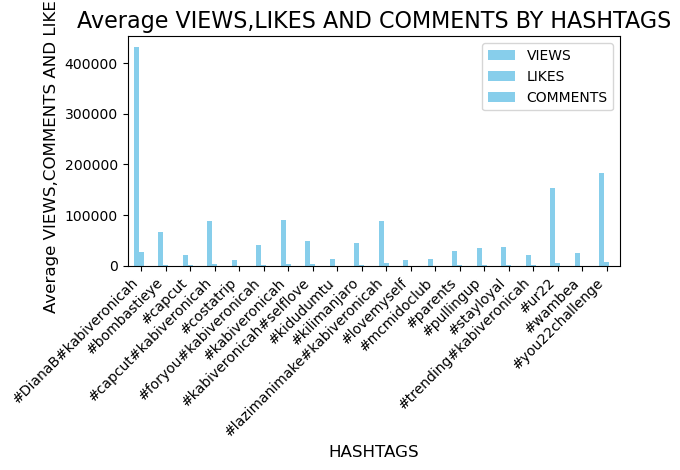

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))


grouped.plot(kind='bar', color='skyblue', width=0.6)  # Adjust bar width for spacing
plt.title("Average VIEWS,LIKES AND COMMENTS BY HASHTAGS", fontsize=16)
plt.xlabel("HASHTAGS", fontsize=12)
plt.ylabel("Average VIEWS,COMMENTS AND LIKES", fontsize=12)


plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()  # Adjusts subplot parameters to give space
plt.show()



CONCLUSIONS
Top-Performing Hashtags:

Hashtags like #kabiveronicah and #you22challenge consistently have the highest averages in views, likes, and comments, indicating strong audience engagement and relevance.
Moderate Engagement Hashtags:

Common hashtags like #capcut have high reach (views) but relatively lower engagement (likes and comments), suggesting they are good for visibility but less effective for deep interaction.
Content-Type Preference:

Event-based and challenge-related hashtags, such as #you22challenge, perform well, showing that the audience enjoys trendy and interactive content.
